In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## 3. Selección de variables

In [2]:
X_train = pd.read_csv('preprocess_data/prep_Xtrain.csv')
X_test = pd.read_csv('preprocess_data/prep_Xtest.csv')

In [3]:
X_train.shape, X_test.shape

((4623, 20), (846, 20))

In [8]:
X_train['churn_yes'].value_counts()
#Hay valores negativos y positivos

0.0    3082
1.0    1541
Name: churn_yes, dtype: int64

In [9]:
y_train = pd.read_csv('preprocess_data/prep_ytrain.csv')
y_test = pd.read_csv('preprocess_data/prep_ytest.csv')

y_train.shape, y_test.shape

((10958, 1), (1934, 1))

In [10]:
y_train = y_train.sample(n=4623, axis=0)
y_test = y_test.sample(n=846, axis=0)

y_train.shape, y_test.shape

((4623, 1), (846, 1))

In [11]:
y_train['churn'].value_counts()

no     3965
yes     658
Name: churn, dtype: int64

In [12]:
y_test['churn'].value_counts()

no     728
yes    118
Name: churn, dtype: int64

In [6]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

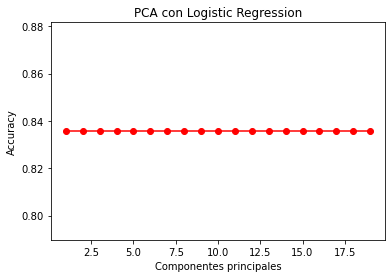

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

pcas = np.arange(1, 20)
accs = []

for pca in pcas:
    #Cálculo de PCA
    pca = PCA(n_components=pca)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    #Entrenamiento del modelo
    lgr_clf_pca = LogisticRegression()
    lgr_clf_pca.fit(X_train_pca, y_train)
    preds_lgr_pca = lgr_clf_pca.predict(X_test_pca)
    acc = accuracy_score(y_test, preds_lgr_pca)
    accs.append(acc)
    
plt.plot(pcas, accs, '-o', color ='red')
plt.title('PCA con Logistic Regression')
plt.xlabel('Componentes principales')
plt.ylabel('Accuracy')
plt.show()

- Mediante el método de PCA es evidente que todas las variables tienen el mismo impacto sobre la que queremos predecir (churn). Por ende se podrían tomar todas como importantes.

## 4. Entrenamiento del modelo

In [9]:
lgr_clf = LogisticRegression()
lgr_clf.fit(X_train, y_train)

LogisticRegression()

In [10]:
preds_lgr = lgr_clf.predict(X_test)

In [16]:
unique, counts = np.unique(preds_lgr, return_counts=True)

np.asarray((unique, counts)).T
#Me parece extraño que no prediga ningún valor 'yes'

array([['no', 846]], dtype=object)

In [12]:
accuracy_score(y_test, preds_lgr)

0.8356973995271868

In [13]:
import joblib

In [ ]:
joblib.dump(linear_model, 'final_model/logistic_reg.joblib')